In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import ast
import pickle
from tangles.separations import SetSeparationSystem
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tangles.movietangles.convenience import *
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from tangles.search import TangleSearchTree

In [5]:
seps, sepidtokeyword = csv_to_setseperationsystem('../data/data_K24.csv')
with open('../orders/orders_O12_K24', 'rb') as f:
    order_O12 = pickle.load(f)
lvltokeyword = [sepidtokeyword[x] for x in np.argsort(order_O12)]
with open('../results/interesting_umbrella_tm_K24.pkl', 'rb') as f:
    interesting_umbrella_tm = pickle.load(f)
oriented_seps = seps[:,np.argsort(order_O12)]

In [37]:
lvltokeyword

[['murder'],
 ['nudity'],
 ['sex'],
 ['woman director'],
 ['violence'],
 ['independent film'],
 ['female nudity'],
 ['based on novel'],
 ['revenge'],
 ['police'],
 ['love'],
 ['teenager'],
 ['blood'],
 ['gore'],
 ['sequel'],
 ['drug'],
 ['monster'],
 ['biography'],
 ['gay'],
 ['dystopia'],
 ['duringcreditsstinger'],
 ['serial killer'],
 ['alien'],
 ['friendship'],
 ['suspense'],
 ['high school'],
 ['rape'],
 ['male nudity'],
 ['musical'],
 ['superhero'],
 ['world war ii'],
 ['sport'],
 ['prison'],
 ['based on comic'],
 ['martial arts'],
 ['lgbt'],
 ['kidnapping'],
 ['slasher'],
 ['detective'],
 ['suicide'],
 ['prostitute'],
 ['death'],
 ['aftercreditsstinger'],
 ['homosexuality'],
 ['robbery'],
 ['party'],
 ['jealousy'],
 ['adultery'],
 ['family'],
 ['torture'],
 ['magic'],
 ['gangster'],
 ['marriage'],
 ['paris'],
 ['explosion'],
 ['psychopath'],
 ['infidelity'],
 ['new york'],
 ['shootout'],
 ['los angeles'],
 ['escape'],
 ['father son relationship'],
 ['vampire'],
 ['hospital'],
 ['

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


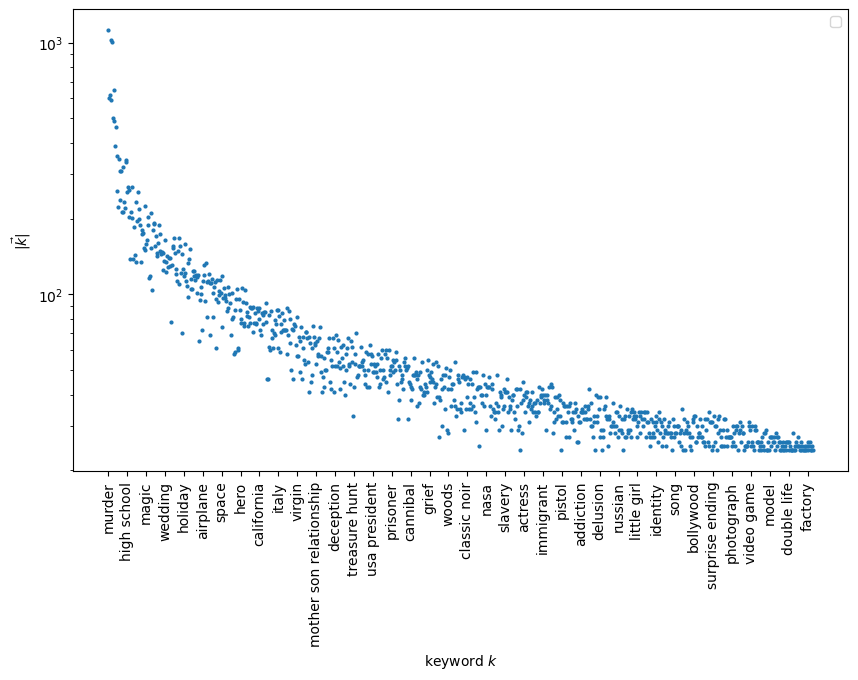

In [13]:
labels = [sepidtokeyword[id][0] for id in np.argsort(order_O12)]
sizes_O12 = [np.count_nonzero(seps[:,x] == 1) for x in np.argsort(order_O12)]
plt.figure(figsize = (10,6))
O12_str = np.argsort(order_O12).astype(str)
plt.scatter(O12_str, np.array(sizes_O12), s = 4)
plt.xticks(O12_str[::25], labels[::25], rotation=90)
plt.xlabel('keyword $k$')
plt.ylabel(r'$| \vec{k} |$')
plt.yscale('log')
#plt.axvline(650, color = 'r', linestyle ='--', label = "keywords on the left where oriented")
plt.legend()
#plt.savefig('O12_sizes.png')

Checks if any level is associated with more than one keyword:

In [6]:
np.any([len(x) > 1 for x in lvltokeyword])

False

In [7]:
for i in range(interesting_umbrella_tm.shape[0]):
    printkeywordsfromtm(interesting_umbrella_tm, i , lvltokeyword)

Tangle:  0
['gay']
['lgbt']
['homosexuality']
Tangle:  1
['murder']
['nudity']
['sex']
['violence']
Tangle:  2
['murder']
['nudity']
['sex']
['female nudity']
Tangle:  3
['nudity']
['sex']
['independent film']
['female nudity']
Tangle:  4
['murder']
['nudity']
['violence']
['independent film']
['female nudity']
Tangle:  5
['nudity']
['sex']
['based on novel']
Tangle:  6
['murder']
['nudity']
['revenge']
Tangle:  7
['murder']
['violence']
['revenge']
Tangle:  8
['murder']
['independent film']
['revenge']
Tangle:  9
['murder']
['violence']
['police']
Tangle:  10
['nudity']
['sex']
['love']
Tangle:  11
['nudity']
['sex']
['teenager']
Tangle:  12
['murder']
['violence']
['blood']
['gore']
Tangle:  13
['nudity']
['sex']
['drug']
Tangle:  14
['nudity']
['female nudity']
['rape']
Tangle:  15
['murder']
['nudity']
['female nudity']
['male nudity']
Tangle:  16
['nudity']
['sex']
['female nudity']
['male nudity']
Tangle:  17
['nudity']
['sex']
['adultery']
Tangle:  18
['superhero']
['based on co

Calculates the sizes of the corpora of the tangles:

In [13]:
corpora = np.zeros((seps.shape[0], interesting_umbrella_tm.shape[0]))
for i in range(seps.shape[0]):
    match = (interesting_umbrella_tm[:,(oriented_seps[i] == 1)] == 1).sum(axis = 1)
    corpora[i, np.where(match >= 3)] = 1
corpora_sizes = (corpora == 1).sum(axis = 0)

How many movies are in the corpora of interesing umbrella tangles?

In [14]:
(corpora.max(axis = 1) == 1).sum()

548

Plots the matrix containing the interesting umbrella tangles:

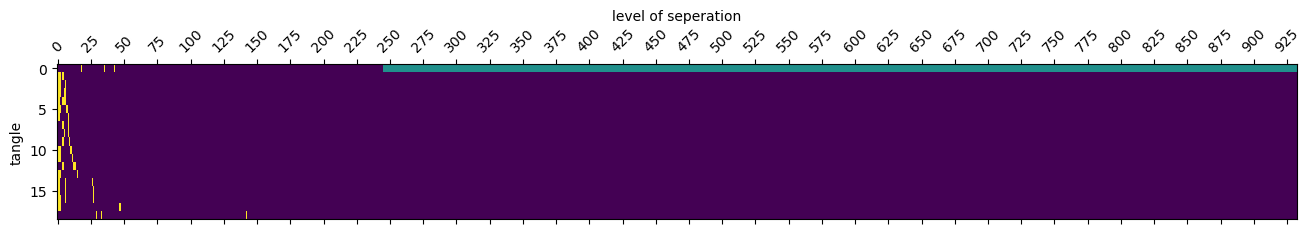

In [23]:
plt.matshow(interesting_umbrella_tm)
plt.gca().set_aspect('auto')
plt.gca().xaxis.set_label_position('top')
plt.xlabel('level of seperation')
plt.ylabel('tangle')
plt.xticks(ticks= range(933)[::25], rotation = 45)
plt.savefig('/home/ocke/Documents/BA-Tangles/tex/images/tm_O12_F24.png', bbox_inches='tight')

Counts keywords, that are not contained in any tangle:

In [24]:
not_contained_keywords = [lvltokeyword[x] for x in np.where((interesting_umbrella_tm == 1).sum(axis = 0) == 0)[0]]
len(not_contained_keywords)

910

Calculates the core of each tangle and counts the tangles with more than 3 movies in its core:

In [25]:
cores = {}
for i in range(interesting_umbrella_tm.shape[0]):
    pos = np.where(interesting_umbrella_tm[i] == 1)[0]
    core = np.where(oriented_seps[:,pos].min(axis = 1) == 1)[0]
    if core.size > 0:
        cores[i] = core   
len([x for x in cores.values() if x.size >= 3])

19

Plots the sizes of the corpora:

Text(0, 0.5, '$|C(\\tau)|$')

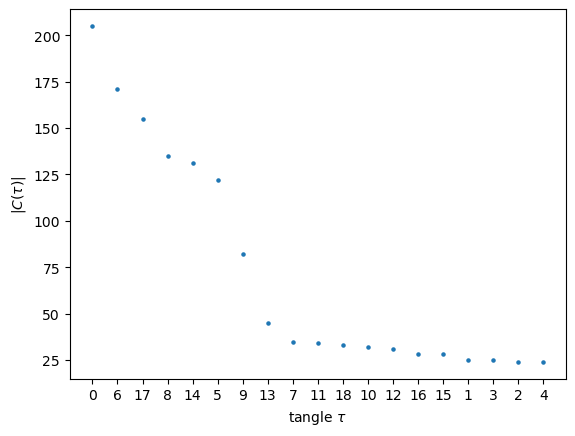

In [29]:
plt.scatter(np.argsort(corpora_sizes).astype(str), np.sort(corpora_sizes)[::-1], s = 5)
#plt.xticks(np.argsort(corpora_sizes).astype(str)[::10], rotation = 45)
plt.xlabel(r'tangle $\tau$')
plt.ylabel(r'$|C(\tau)|$')
#plt.savefig('/home/ocke/Documents/BA-Tangles/tex/images/body_sizes_F3.png', bbox_inches='tight')

In [31]:
data = pd.read_csv('../data/data_K24.csv')
data['keywords'] = data['keywords'].apply(lambda x: ast.literal_eval(x))
data["genres"] = data["genres"].apply(lambda x: ast.literal_eval(x))

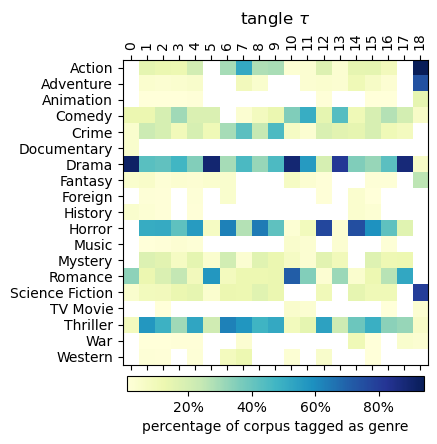

In [36]:
fig = plot_genre_mat(data, corpora, range(19))
plt.title(r"tangle $\tau$")
cbar = plt.colorbar(fig, orientation = "horizontal", pad = 0.03, shrink = 0.8)
cbar.set_label("percentage of corpus tagged as genre")
cbar.set_ticks(ticks=[0.2,0.4,0.6,0.8],labels= ["20%", "40%", "60%", "80%"])
plt.savefig('/home/ocke/Documents/BA-Tangles/tex/images/genre_mat_F24.png', bbox_inches='tight')